In [2]:
import os
from dotenv import find_dotenv, load_dotenv
from fredapi import Fred
import pandas as pd
import pandas_datareader as pdr

%matplotlib inline
import matplotlib.pyplot as plt

load_dotenv(find_dotenv())
fred_api_key = os.environ.get('FRED_API_KEY')
fred = Fred(api_key=fred_api_key)

In [2]:
ticker = 'CYS'
series_ids = ['SP500', 'DGS10', 'DGS5', 'USD3MTD156N', 'USD1WKD156N', 'FF']

In [3]:
ff_info = fred.get_series_info('FF')
print(ff_info)

frequency                                             Weekly, Ending Wednesday
frequency_short                                                              W
id                                                                          FF
last_updated                                            2017-11-24 15:41:07-06
notes                        Averages of daily figures.  The federal funds ...
observation_end                                                     2017-11-22
observation_start                                                   1954-07-07
popularity                                                                  56
realtime_end                                                        2017-11-28
realtime_start                                                      2017-11-28
seasonal_adjustment                                    Not Seasonally Adjusted
seasonal_adjustment_short                                                  NSA
title                                             Ef

In [4]:
for id in series_ids:
    info = fred.get_series_info(id)
    print('{0} is {1}'.format(info['id'], info['frequency']))

SP500 is Daily
DGS10 is Daily
DGS5 is Daily
USD3MTD156N is Daily
USD1WKD156N is Daily
FF is Weekly, Ending Wednesday


In [5]:
ff_tail = fred.get_series('FF')
print(ff_tail.tail(10))

2017-09-20    1.16
2017-09-27    1.16
2017-10-04    1.12
2017-10-11    1.16
2017-10-18    1.16
2017-10-25    1.16
2017-11-01    1.15
2017-11-08    1.16
2017-11-15    1.16
2017-11-22    1.16
dtype: float64


In [3]:
cys = pdr.get_data_yahoo('CYS')
print(cys.tail(10))

            Open  High   Low  Close  Adj Close   Volume
Date                                                   
2017-11-13  7.86  7.96  7.82   7.96       7.96  1554200
2017-11-14  7.96  8.07  7.94   8.03       8.03   625900
2017-11-15  8.03  8.06  7.96   7.97       7.97   625100
2017-11-16  7.96  8.04  7.96   7.98       7.98   689300
2017-11-17  7.98  8.06  7.97   8.05       8.05   758400
2017-11-20  8.05  8.15  8.03   8.15       8.15   727700
2017-11-21  8.17  8.24  8.13   8.24       8.24   984400
2017-11-22  8.24  8.33  8.24   8.33       8.33   868100
2017-11-24  8.30  8.32  8.24   8.25       8.25   260900
2017-11-27  8.27  8.31  8.23   8.25       8.25   754600


In [8]:
df ={}
for id in series_ids:
    df[id] = fred.get_series(id)
df['label'] = pdr.get_data_yahoo('CYS')['Close']
df = pd.DataFrame(df)
print(df.tail(10))

            DGS10  DGS5    FF    SP500  USD1WKD156N  USD3MTD156N  label
2017-11-14   2.38  2.06   NaN  2578.87      1.20406      1.41899   8.03
2017-11-15   2.33  2.04  1.16  2564.62      1.20356      1.42190   7.97
2017-11-16   2.37  2.07   NaN  2585.64      1.20372      1.43567   7.98
2017-11-17   2.35  2.06   NaN  2578.85      1.20267      1.44067   8.05
2017-11-20   2.37  2.09   NaN  2582.14      1.20367      1.44594   8.15
2017-11-21   2.36  2.11   NaN  2599.03          NaN          NaN   8.24
2017-11-22   2.32  2.05  1.16  2597.08          NaN          NaN   8.33
2017-11-23    NaN   NaN   NaN      NaN          NaN          NaN    NaN
2017-11-24   2.34  2.07   NaN  2602.42          NaN          NaN   8.25
2017-11-27    NaN   NaN   NaN  2601.42          NaN          NaN   8.25


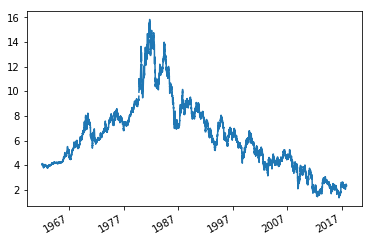

In [9]:
df['DGS10'].plot()